In [2]:
import pandas as pd 

mises_refs_df = pd.read_csv("../data/processed/mises_refs.csv")

In [3]:
mises_refs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8345 entries, 0 to 8344
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0.1                      8345 non-null   int64  
 1   Unnamed: 0                        8345 non-null   int64  
 2   paper_id                          8345 non-null   int64  
 3   raw                               8345 non-null   object 
 4   context                           8345 non-null   object 
 5   sentence_id                       8345 non-null   object 
 6   sentence_seq_number               8345 non-null   int64  
 7   author                            8345 non-null   object 
 8   page                              3490 non-null   float64
 9   year                              8122 non-null   float64
 10  title                             8345 non-null   object 
 11  filename                          8345 non-null   object 
 12  senten

In [4]:
mises_refs_df.head()

,Unnamed: 0.1,Unnamed: 0,paper_id,raw,context,sentence_id,sentence_seq_number,author,page,year,...,DOI,Link,Author Keywords,Publisher,Open Access,human_action_chapter_by_ref_page,human_action_chapter_number,human_action_chapter_name,human_action_part_number,human_action_part_name
0,0,279406,2258,"Mises, 1944: 1-19)","(Lippmann, 1938(Lippmann, /1943: 263;: 263; em...",_WpcSVk3,3456,Mises,1.0,1944.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
1,1,116549,1073,"(Mises, 19491",Such a conclusion seems warranted from the fac...,_TbhKwuj,187,Mises,1.0,1949.0,...,10.1002/mar.4220100603,https://www.scopus.com/inward/record.uri?eid=2...,NaN,NaN,NaN,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
2,2,279364,2258,Mises (1944: 1-19),"Indeed, Mises (1944: 1-19) explicitly cites th...",_hqXcvq9,3399,Mises,1.0,1944.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
3,3,254368,2132,"Mises, 1949, pp.1-71)",Utilising the theory of human action developed...,_6pNjGwA,39,Mises,1.0,1949.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action
4,4,218888,1740,"(Mises, [ ] 2007, p. 1), p. 1)",Abstaining from explicitly articulating any me...,_2MN3vn2,303,Mises,1.0,2007.0,...,10.1080/1350178X.2021.1926528,https://www.scopus.com/inward/record.uri?eid=2...,Austrian School of Economics; compatibilism; D...,Routledge,NaN,0.0,0.0,Chapter 0: Introduction,1.0,Part 1: Human Action


In [27]:
mises_refs_df['human_action_part_name'].unique()

array(['Part 1: Human Action',
       'Part 2: Action Within the Framework of Society',
       'Part 3: Economic Calculation', 'Part 4: Catallatics',
       'Part 5: Social Cooperation without a Market',
       'Part 6: The Hampered Market Economy',
       'Part 7: The Place of Economics in Society', nan], dtype=object)

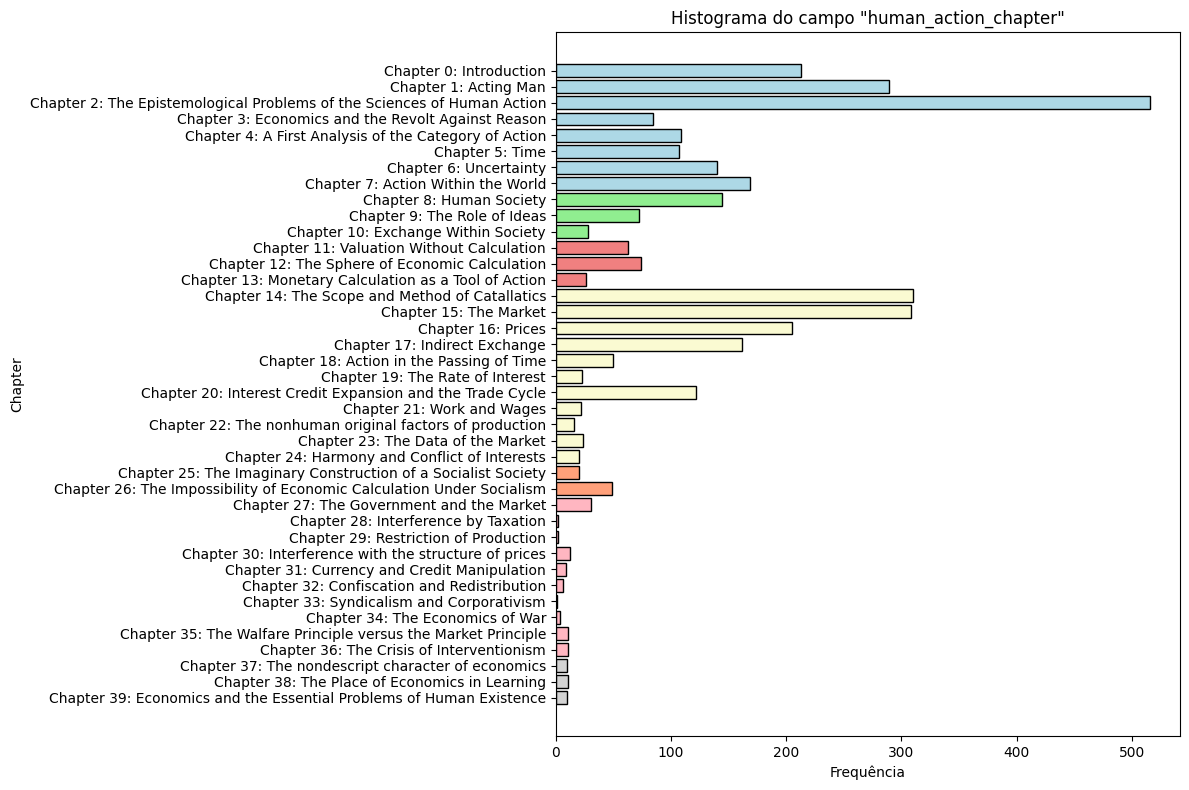

In [5]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# Drop rows where 'human_action_chapter' is "not found"
filtered_df = mises_refs_df[mises_refs_df['human_action_chapter_name'] != 'not found']

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_chapter_name', 'human_action_chapter_number', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_chapter_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_chapter_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_chapter"')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../data/processed/figures/human_action_chapters.png')

# Show the plot
plt.show()


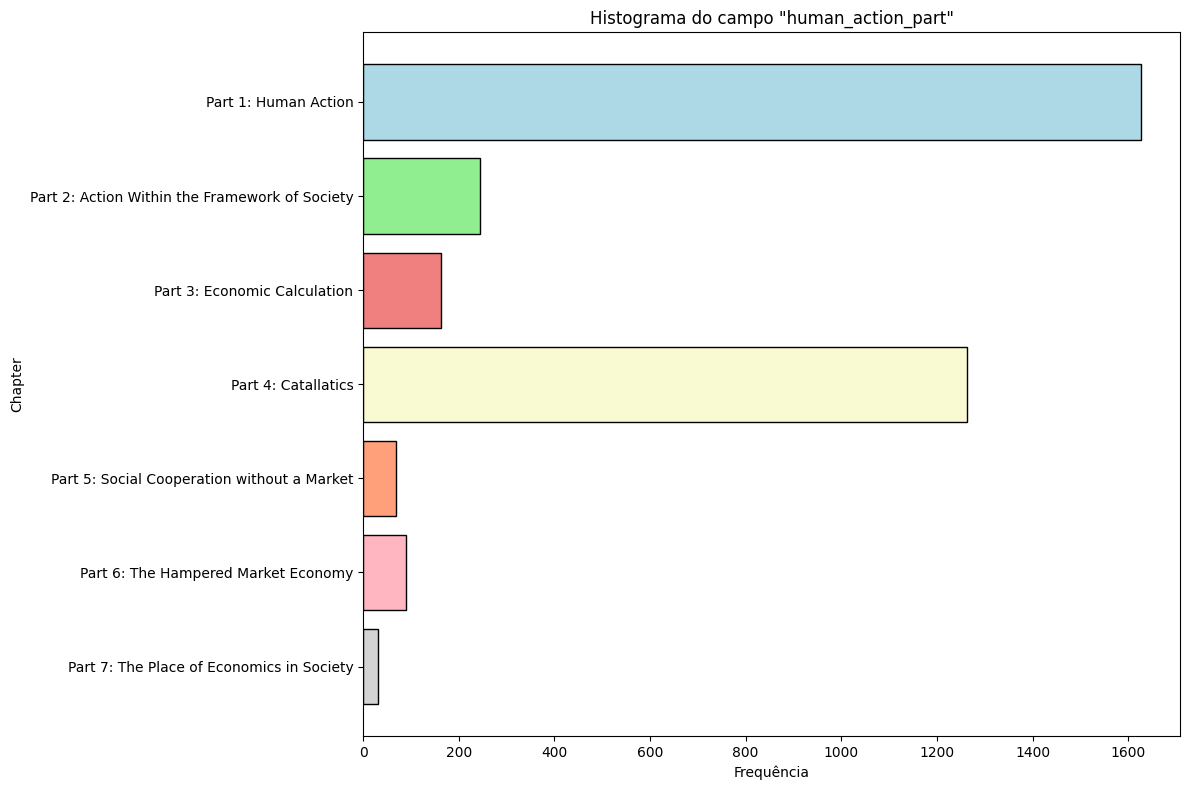

In [6]:
import matplotlib.pyplot as plt

# Simulating the DataFrame (example)
# data = {'human_action_chapter': ['Chapter 3', 'Chapter 1', 'not found', 'Chapter 2', 'Chapter 11', 'Chapter 1', 'not found']}
# mises_refs_df = pd.DataFrame(data)

# Drop rows where 'human_action_chapter' is "not found"
filtered_df = mises_refs_df[mises_refs_df['human_action_chapter_name'] != 'not found']

# Color mapping based on parts
part_colors = {
    1: 'lightblue',
    2: 'lightgreen',
    3: 'lightcoral',
    4: 'lightgoldenrodyellow',
    5: 'lightsalmon',
    6: 'lightpink',
    7: 'lightgray'
}


# Assign colors to each chapter based on its part
filtered_df['bar_color'] = filtered_df['human_action_part_number'].map(part_colors)

# Group by chapter and count occurrences, then sort by chapter number
chapter_counts_sorted = (
    filtered_df.groupby(['human_action_part_name', 'human_action_part_number', 'bar_color']).size().reset_index(name='counts')
    .sort_values(by='human_action_part_number', ascending=False)
)

# Plot the histogram with adjusted vertical space
plt.figure(figsize=(12, 8))  # Increased height for more vertical space
plt.barh(chapter_counts_sorted['human_action_part_name'], chapter_counts_sorted['counts'], 
         color=chapter_counts_sorted['bar_color'], edgecolor='black')

plt.title('Histograma do campo "human_action_part"')
plt.xlabel('Frequência')
plt.ylabel('Chapter')

# Adjust layout for better label display
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('../data/processed/figures/human_action_parts.png')

# Show the plot
plt.show()


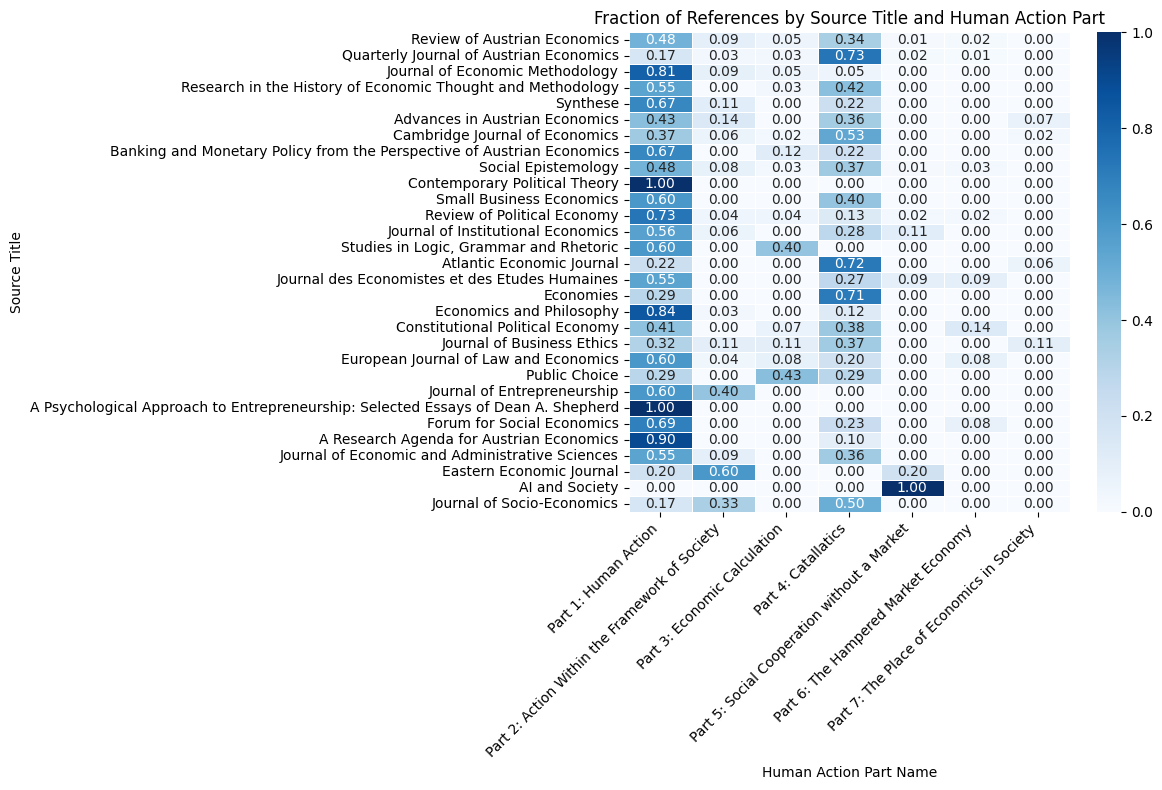

Heatmap saved to ../data/processed/figures\mises_heatmap.png


In [7]:
'''
prompt:
Write python code that works with mises_refs_df.
Take the top 15 'Source title' and build a heat map showing the fraction of references (rows) that fall on each 'human_action_part_name'.

Sort 'Source title' from the most to the least frequent.

Save the image at "../data/processed/figures".

'''

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure output directory exists
output_dir = "../data/processed/figures"
os.makedirs(output_dir, exist_ok=True)

# Get top 15 'Source title'
top_sources = (
    mises_refs_df['Source title']
    .value_counts()
    .head(30)
    .index
)

# Filter DataFrame to only include top 15 'Source title'
filtered_df = mises_refs_df[mises_refs_df['Source title'].isin(top_sources)]

# Create a crosstab (count table)
count_table = pd.crosstab(
    filtered_df['Source title'],
    filtered_df['human_action_part_name'],
    normalize='index'  # Normalize by row to get fractions
)

# Reorder rows from most to least frequent
ordered_index = (
    mises_refs_df['Source title']
    .value_counts()
    .loc[top_sources]
    .index
)

# Reorder the count_table accordingly
count_table = count_table.loc[ordered_index]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(count_table, cmap="Blues", linewidths=0.5, annot=True, fmt=".2f")

plt.title("Fraction of References by Source Title and Human Action Part")
plt.xlabel("Human Action Part Name")
plt.ylabel("Source Title")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
output_path = os.path.join(output_dir, "mises_heatmap.png")
plt.savefig(output_path, dpi=300)

plt.show()

print(f"Heatmap saved to {output_path}")
plt.close()


In [8]:
'''
prompt:
_ é um pandas df com pares (paper_id, human_action_chapter_number). 
Gere código que gera uma matriz em que cada linha é um paper_id e cada coluna conta quantas ocorrências de human_action_chapter_number existem para este paper_id.
'''

import pandas as pd

# Supondo que mises_res_fd já esteja definido como um DataFrame com colunas:
# 'paper_id' e 'human_action_chapter_number'

# Cria a matriz de contagem (cada linha é um paper_id, cada coluna um capítulo, com as contagens)
chapter_matrix = pd.crosstab(
    index=mises_refs_df['paper_id'],
    columns=mises_refs_df['human_action_chapter_number']
)

# Renomeia as colunas para deixar claro que são capítulos
chapter_matrix.columns = [f'chapter_{col}' for col in chapter_matrix.columns]

chapter_matrix.shape



(813, 40)

In [9]:
'''
prompt:
_ é um pandas df com pares (paper_id, human_action_chapter_number). 
Gere código que gera uma matriz em que cada linha é um paper_id e cada coluna conta quantas ocorrências de human_action_chapter_number existem para este paper_id.
'''

import pandas as pd

# Supondo que mises_res_fd já esteja definido como um DataFrame com colunas:
# 'paper_id' e 'human_action_chapter_number'

# Cria a matriz de contagem (cada linha é um paper_id, cada coluna um capítulo, com as contagens)
part_matrix = pd.crosstab(
    index=mises_refs_df['paper_id'],
    columns=mises_refs_df['human_action_part_number']
)

# Renomeia as colunas para deixar claro que são capítulos
part_matrix.columns = [f'part_{col}' for col in part_matrix.columns]

part_matrix.shape



(813, 7)

In [17]:
part_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 2 to 2291
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   part_1.0  813 non-null    int64
 1   part_2.0  813 non-null    int64
 2   part_3.0  813 non-null    int64
 3   part_4.0  813 non-null    int64
 4   part_5.0  813 non-null    int64
 5   part_6.0  813 non-null    int64
 6   part_7.0  813 non-null    int64
dtypes: int64(7)
memory usage: 50.8 KB


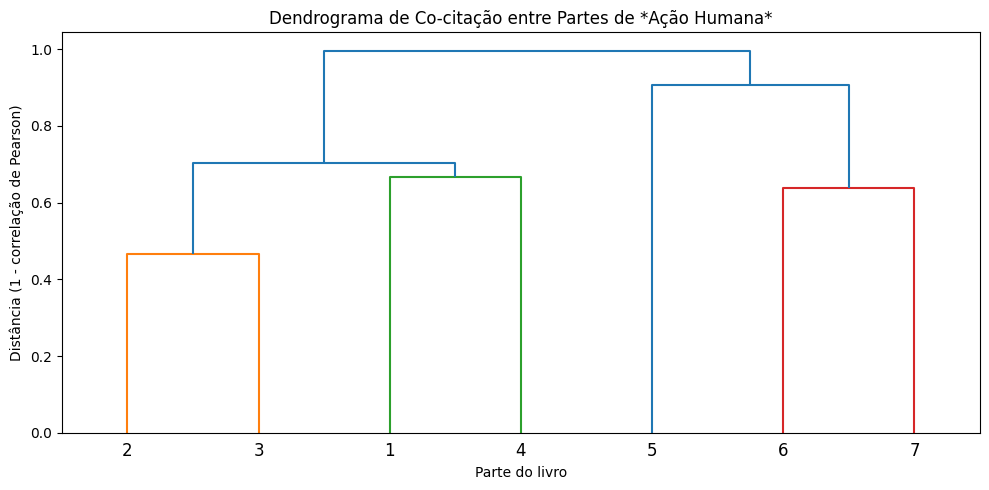

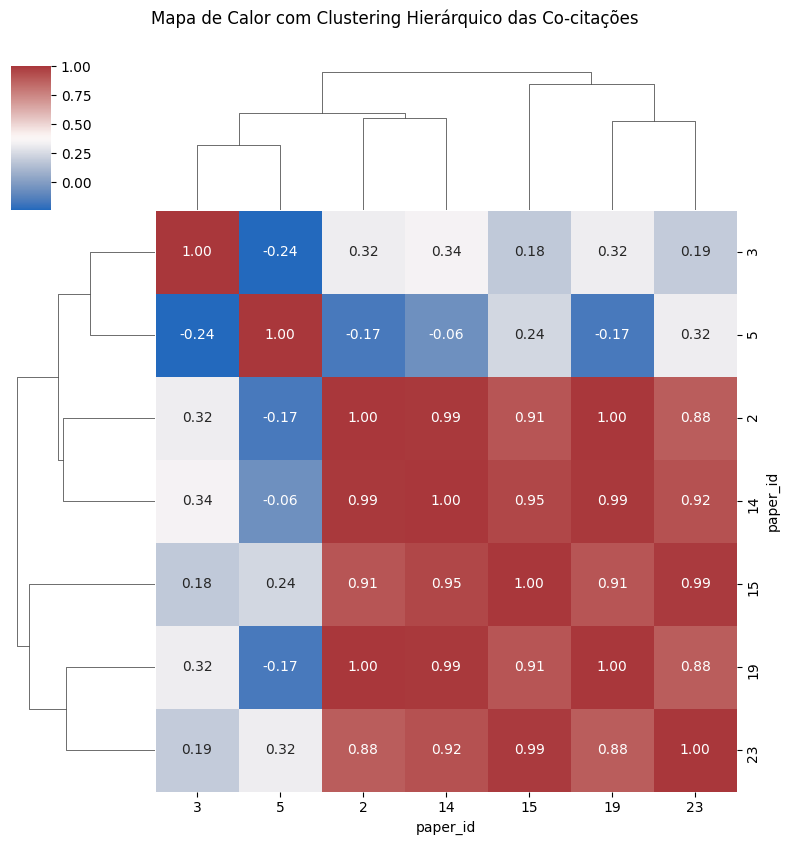


=== Clusters de partes do livro ===
  Parte  Cluster
1     2        1
2     3        1
0     1        2
3     4        3
5     6        4
6     7        5
4     5        6


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# =====================
# 1. Preparação: Matriz de co-citação
# =====================

# Transforma a matriz de papers x partes para partes x papers
part_by_paper = part_matrix.T

# Calcula a matriz de correlação entre as partes (para visualização)
correlation_matrix = part_by_paper.corr()

# Calcula a matriz de distância baseada em correlação de Pearson (1 - r)
# pdist retorna formato "condensed" automaticamente
distance_condensed = pdist(part_by_paper, metric='correlation')

# =====================
# 2. Clustering hierárquico
# =====================

# Aplica o clustering (método 'average', mas você pode testar 'ward' ou 'complete')
linked = linkage(distance_condensed, method='complete')

# =====================
# 3. Dendrograma
# =====================

# Nomes amigáveis para os capítulos
labels = [col.replace("part_", "").replace(".0", "") for col in part_matrix.columns]

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=labels)
plt.title("Dendrograma de Co-citação entre Partes de *Ação Humana*")
plt.xlabel("Parte do livro")
plt.ylabel("Distância (1 - correlação de Pearson)")
plt.tight_layout()
plt.show()

# =====================
# 4. Clustermap
# =====================

sns.clustermap(
    correlation_matrix,
    row_linkage=linked,
    col_linkage=linked,
    cmap="vlag",         # "coolwarm", "RdBu_r", etc. também funcionam
    annot=True,
    fmt=".2f",
    figsize=(8, 8)
)
plt.suptitle("Mapa de Calor com Clustering Hierárquico das Co-citações", y=1.05)
plt.show()

# =====================
# 5. (Opcional) Extrair clusters
# =====================

# Escolha a distância máxima entre itens do mesmo cluster (ajuste conforme necessário)
max_dist = 0.5
cluster_labels = fcluster(linked, max_dist, criterion='distance')

# Cria um dataframe com os resultados
clusters_df = pd.DataFrame({
    'Parte': part_matrix.columns,
    'Cluster': cluster_labels
})

# Limpa os nomes
clusters_df['Parte'] = clusters_df['Parte'].str.replace("part_", "").str.replace(".0", "")
clusters_df = clusters_df.sort_values(by='Cluster')

print("\n=== Clusters de partes do livro ===")
print(clusters_df)


In [25]:
linked

array([[ 0.00000000e+00,  2.90000000e+01, -2.22044605e-16,
         2.00000000e+00],
       [ 2.00000000e+00,  7.55000000e+02, -2.22044605e-16,
         2.00000000e+00],
       [ 5.00000000e+00,  2.41000000e+02, -2.22044605e-16,
         2.00000000e+00],
       ...,
       [ 1.61200000e+03,  1.62100000e+03,  1.12742620e+00,
         7.90000000e+02],
       [ 1.61700000e+03,  1.62200000e+03,  1.16944172e+00,
         8.09000000e+02],
       [ 1.61100000e+03,  1.62300000e+03,  1.20083710e+00,
         8.13000000e+02]])

In [11]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
pd.set_option('display.max_rows', None)


from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# 1. Transformar a matrix de contagens em booleana (1 se capítulo apareceu, 0 caso contrário)
chapter_bool = chapter_matrix > 0

# 2. Minerar os itemsets frequentes (frequência mínima ajustável com min_support)
frequent_itemsets = apriori(chapter_bool, min_support=0.01, use_colnames=True)


frequent_itemsets.sort_values(by='support', ascending=False).head(100) 


,support,itemsets
2,0.244772,(chapter_2.0)
1,0.206642,(chapter_1.0)
15,0.198032,(chapter_15.0)
14,0.196802,(chapter_14.0)
7,0.132841,(chapter_7.0)
16,0.127921,(chapter_16.0)
0,0.118081,(chapter_0.0)
44,0.097171,"(chapter_2.0, chapter_1.0)"
17,0.093481,(chapter_17.0)
8,0.087331,(chapter_8.0)


In [28]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_rows', None)

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

pd.set_option('display.max_rows', None)

# 1. Transformar a matriz de contagens em booleana (1 se capítulo apareceu, 0 caso contrário)
part_bool = part_matrix > 0

# 2. Minerar os itemsets frequentes
frequent_itemsets = apriori(part_bool, min_support=0.01, use_colnames=True)

# 3. Identificar closed itemsets
def is_closed(row, all_itemsets_df):
    current_items = set(row['itemsets'])
    current_support = row['support']
    for _, other_row in all_itemsets_df.iterrows():
        other_items = set(other_row['itemsets'])
        other_support = other_row['support']
        if current_items < other_items and current_support == other_support:
            return False
    return True

frequent_itemsets['is_closed'] = frequent_itemsets.apply(lambda row: is_closed(row, frequent_itemsets), axis=1)

# 4. Filtrar apenas os closed itemsets
closed_itemsets = frequent_itemsets[frequent_itemsets['is_closed']]

# 5. Exibir
frequent_itemsets.sort_values(by='support', ascending=False).head(100)


,support,itemsets,is_closed
0,0.570726,(part_1.0),True
3,0.537515,(part_4.0),True
9,0.206642,"(part_1.0, part_4.0)",True
1,0.146371,(part_2.0),True
2,0.121771,(part_3.0),True
7,0.099631,"(part_1.0, part_2.0)",True
14,0.091021,"(part_4.0, part_2.0)",True
8,0.073801,"(part_1.0, part_3.0)",True
5,0.070111,(part_6.0),True
26,0.062731,"(part_1.0, part_4.0, part_2.0)",True


In [14]:
part_matrix.head()

,part_1.0,part_2.0,part_3.0,part_4.0,part_5.0,part_6.0,part_7.0
paper_id,,,,,,,
2,0,0,0,2,0,0,0
3,0,2,0,1,0,0,0
5,1,0,0,0,0,0,0
14,2,1,0,16,0,1,0
15,3,0,0,7,0,1,0


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Normalizar os dados (importante para PCA)
scaler = StandardScaler()
part_matrix_scaled = scaler.fit_transform(part_matrix)

# 2. Aplicar PCA
pca = PCA()
pca.fit(part_matrix_scaled)

# 3. Mostrar a % de variação explicada por componente
explained_variance_ratio = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance_ratio, start=1):
    print(f'Componente {i}: {var:.2%} da variância explicada')

print('\nComponentes principais (loadings):')
# Cria um DataFrame para mostrar os componentes com nomes das variáveis
loadings_df = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i}' for i in range(1, len(explained_variance_ratio) + 1)], 
    index=part_matrix.columns
)
print(loadings_df)


Componente 1: 34.18% da variância explicada
Componente 2: 17.95% da variância explicada
Componente 3: 13.87% da variância explicada
Componente 4: 10.31% da variância explicada
Componente 5: 9.66% da variância explicada
Componente 6: 8.27% da variância explicada
Componente 7: 5.76% da variância explicada

Componentes principais (loadings):
               PC1       PC2       PC3       PC4       PC5       PC6       PC7
part_1.0  0.384003 -0.311433 -0.246014  0.241231  0.783090  0.055088  0.143423
part_2.0  0.521197 -0.041510  0.087520 -0.269245 -0.282682 -0.181431  0.730515
part_3.0  0.447905 -0.274518  0.307264 -0.462366  0.036365 -0.254291 -0.591474
part_4.0  0.388776 -0.315527 -0.095396  0.635728 -0.515395  0.164614 -0.208125
part_5.0  0.200556  0.386678  0.772192  0.263705  0.186787  0.328845  0.037514
part_6.0  0.258482  0.636557 -0.219408  0.270531  0.046313 -0.616232 -0.157378
part_7.0  0.349419  0.414299 -0.428817 -0.329629 -0.053583  0.620004 -0.162623


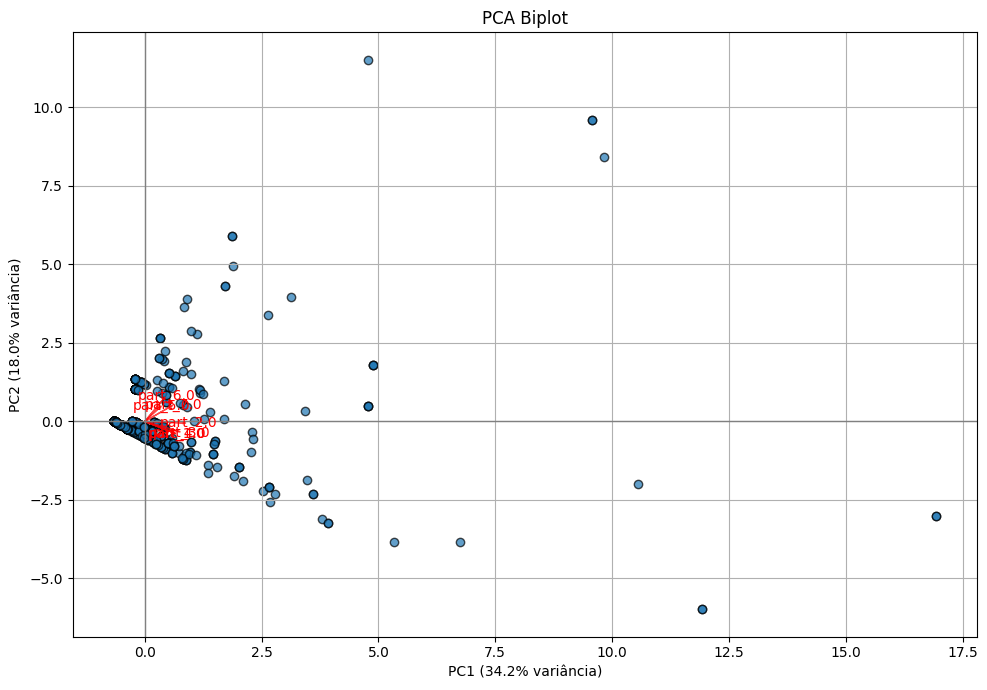

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(part_matrix)

# 2. Aplicar PCA e pegar os 2 primeiros componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Preparar o gráfico
fig, ax = plt.subplots(figsize=(10, 7))

# Plot dos pontos dos dados nos 2 primeiros PCs
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolor='k')

# 4. Plotar as setas das variáveis originais (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

feature_names = part_matrix.columns

for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1],
             color='r', alpha=0.7, head_width=0.05)
    ax.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, 
            color='r', ha='center', va='center')

# 5. Configurações do gráfico
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)')
ax.set_title('PCA Biplot')
ax.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.tight_layout()
plt.show()
